<h1>Lab: Measuring Equipotential Surfaces</h1>
<h2>Introduction</h2>
In this lab we will study the equipotential surfaces from two arrangements of conductors, shown below.
First we will perform an experiment to create these conductor arrangements and measure directly the equipotential lines. 
Then we will compute the expected equipotential lines from first principles, and compare our computation with the experimental results. 

<h3>Geometry One</h3>

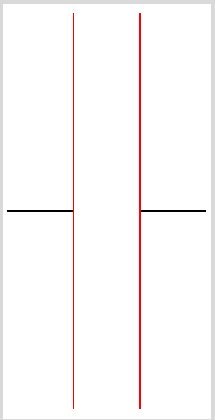

<h3>Geometry Two</h3>

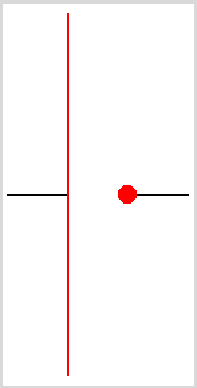

## Conceptual Question: What do you expect the Equipotential Lines to Look Like Here?

Based on symmetry, what would you expect the equipotential lines to look like for:

   * (a) a single vertical line charge?
   * (b) two line charges parallel to each other?
   * (c) a single point charge?
   * (d) a single point charge beside a vertical line charge?
   
   
## Experimental Method

You will make the conductors depicted above by painting on conducting paper with silver paint using the provided templates. The black paper has carbon in it and it is a poor conductor. The paint contains silver and is a very good conductor. Cut the black paper in half and paint the two geometries shown below onto the paper. The conducting paper is a good enough conductor to make a complete circuit but a poor enough conductor so that the charges will leak off the silver only very slowly.<br><br>
The black lines in the above diagrams represent *leads* that connect to the conductors - 
these should be painted as thin lines. Paint them to the edge of the paper.
<br><br>
Test your conductors with the multimeter to make sure that they are conducting. The resistance should be a few Ohms or less.  Put a piece of carbon paper under the conductive paper and put a piece of tracing paper under the carbon paper. Hold the three pieces of paper together with paper clips. Attach alligator clips to the end of the two leads and use the power supply to put 15 volts across the conductors. Now use the probes of the multimeter to find the equipotential surfaces. 
<br><br>
To find the five volt line, for example, place one probe on one of the conductors and move the second probe lightly across the paper until the multimeter reads 5 volts. Then press down hard with the probe so that you make a mark on the carbon paper. (<u>Make sure that you hold the probe vertically so that you are measuring only the potential at the tip.</u>) Continue this way moving the probe across the region between the conductors pressing down each time you get five volts. Do this for three or four different potential surfaces. Now look at your tracing paper and connect the dots for each potential surface. This will give you the  equipotential surfaces (or at least three or four of them).
<br><br>
Do the same thing for the second conductor.


<h2>Theory: Computing Equipotential Lines for Given Charge Arrangement</h2>

In order to calculate what the equipotential surfaces such look like, we first need the potential from a line charge. The geometry is shown below. The line is assumed to have length $L$ and is centered with respect to the x axis. The piece in red is a small charge element $dq$ which is a distance $s$ from the origin, and has a length $ds$.
The potential from this element is  $dV=\frac{dq}{(4 \pi \epsilon_0 r)}$, at some distance $r$ from the charge element $dq$

The distance $r$ is given by $r = \sqrt{x^2 + (y-s)^2}$ and $dq = \lambda ds$ where $\lambda = \frac{Q}{L}$ is the linear charge density. The potential due to the line charge is the integral of all the contributions $dV$ from each element $dq$ in the line;  that is, 
over the full range of $ds$ from $\frac{-L}{2}$ to$ \frac{+L}{2}$

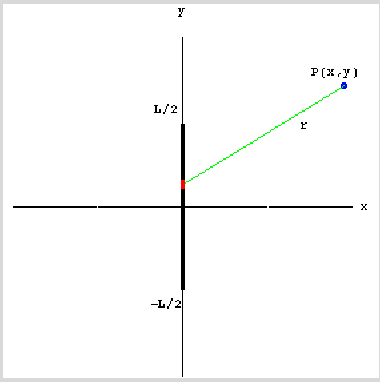

In [2]:
# as in the previous lab, we will use symbolic python (sympy) to first obtain the expressions, then later evaluate them
# sympy:  www.sympy.org

import sympy as sym

x, s, y, L, Q, π, ϵ0, d = sym.symbols('x s y L Q π ϵ0 d')

# In principle sympy could even do the integration for us, if we gave it the element dV to integrate
# however, for the cases we will consider, this integration would give arcsinh functions
# and when i did this in practice, I found that the evaluation of the related arcsinh functions was not behaving
# symmetrically around the x-axis, causing unphysical equipotential lines

# so instead we will do the integral by hand and implement the result directly here.
# the result in our case, for a line charge from -L/2 to +L/2, with total charge Q, located at x=o
# is V(x,y) =

Vline_ln = (Q/L) * (1/(4*π*ϵ0)) * sym.log((y+L/2+sym.sqrt(x**2+(y+L/2)**2))/(y-L/2+sym.sqrt(x**2+(y-L/2)**2)))

print(Vline_ln)


# Note: for reference, below is the line of syntax we would use to do the integral in sympy
# But as stated above, I did not find good numerical results from this approach in the cases we consider, so 
# we will not do it this way in this lab

# sympy integration syntax:
#integrate(f, (x, a, b)) returns the definite integral
# from https://docs.sympy.org/latest/modules/integrals/integrals.html

#VLine = (Q/L) * (1/(4*π*ϵ0)) * (sym.integrate(1/(sym.sqrt(x**2 + (y-s)**2)), (s,-L/2,L/2)))

Q*log((L/2 + y + sqrt(x**2 + (L/2 + y)**2))/(-L/2 + y + sqrt(x**2 + (-L/2 + y)**2)))/(4*L*π*ϵ0)


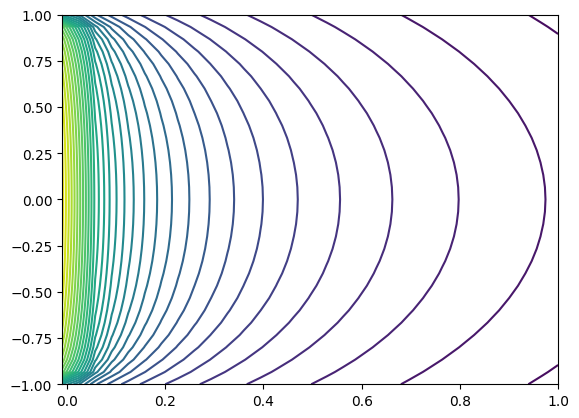

In [3]:
# Now we will plot the potential due to this line charge

from matplotlib import pyplot as plt
import numpy as np

# we define the xy area that we wish to study
# lets avoid the value x=0 as potential is infinite there
X = np.linspace(-0.01, 1, 31)
Y = np.linspace(-1, 1, 31)

# lets make a meshgrid to span this xy area
xx, yy = np.meshgrid(X,Y)

# now we need to evaluate the potential (which is a scalar, so magnitude only) at each point in this meshgrid
# Doing this in correct order is key - the following code does that
Z = [] # this will be our potential, representing the Z axis
# take the y values one at a time
for yi in Y:
    thisline = []
    # now we will step through all x locations at this yi
    for xi in X:
        # and at the point (xi,yi), we evaluate the potential 
        V3 = Vline_ln.subs({L: 2, Q: 4*np.pi, x: xi, y: yi, π: np.pi, ϵ0: 1})
        thisline.append(V3)
    Z.append(thisline)

#print(Z)
Z = np.asarray(Z).astype(float)

plt.contour(xx, yy, Z, levels=40)

plt.show()

-Q*log((L/2 + y + sqrt((L/2 + y)**2 + (-d + x)**2))/(-L/2 + y + sqrt((-L/2 + y)**2 + (-d + x)**2)))/(4*L*π*ϵ0)


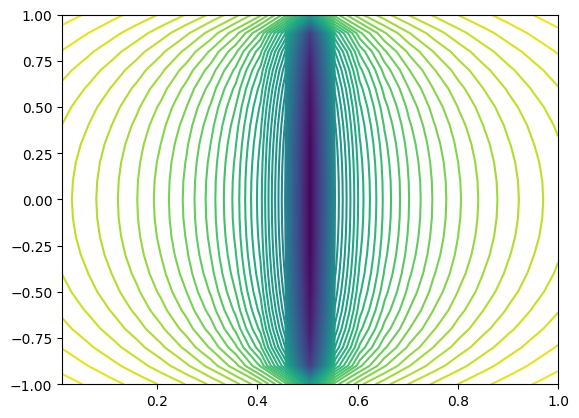

In [4]:
#Now we can consider a second line of charge. 
#Suppose it is located at a distance $d$ on the x-axis  and has negative charge, -Q

# we can define this by appropriate subsitution into our original line charge expression
# Q-> -Q means we should make the new potential = -1* original potential
# and if the line charge is located at d along x-axis, then  a point x will be a distance (x-d) from it:

Vline2_ln = -Vline_ln.subs({x:x-d})
print(Vline2_ln)

# we define the xy area that we wish to study
X = np.linspace(0.01, 1, 21)
Y = np.linspace(-1, 1, 21)

# lets make a meshgrid to span this xy area
xx, yy = np.meshgrid(X,Y)

# now we need to evaluate the potential (scalar, so magnitude only) at each point in this meshgrid
# Doing this in correct order is key - the following code does that
Z = [] # this will be our potential, representing the Z axis
# take the y values one at a time
for yi in Y:
    thisline = []
    # now we will step through all x locations at this yi
    for xi in X:
        # and at the point (xi,yi), we evaluate the potential 
        V3 = Vline2_ln.subs({L: 2, Q: 4*np.pi, x: xi, y: yi, d:0.5, π: np.pi, ϵ0: 1})
        thisline.append(V3)
    Z.append(thisline)

#print(Z)
Z = np.asarray(Z).astype(float)

plt.contour(xx, yy, Z, levels=50)

### First Conductor Arrangement: Two Line Charges with Opposite Charge

The potential due to the two oppositely-charged line charges which are separated by a distance d is then simply the sum of the two potentials from each line charge:

In [5]:
Vtotal_ln = Vline_ln+Vline2_ln
print(Vtotal_ln)

Q*log((L/2 + y + sqrt(x**2 + (L/2 + y)**2))/(-L/2 + y + sqrt(x**2 + (-L/2 + y)**2)))/(4*L*π*ϵ0) - Q*log((L/2 + y + sqrt((L/2 + y)**2 + (-d + x)**2))/(-L/2 + y + sqrt((-L/2 + y)**2 + (-d + x)**2)))/(4*L*π*ϵ0)


We can plot the equipotential surfaces with a contour plot.

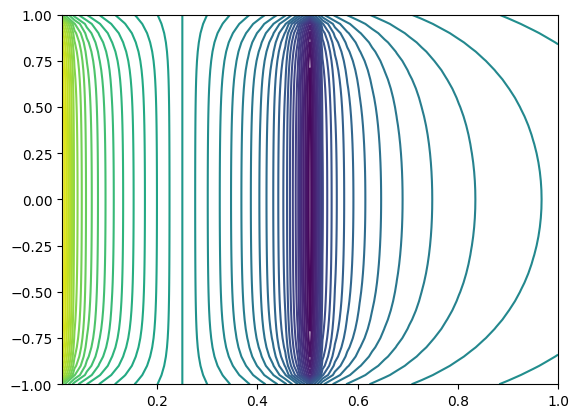

In [6]:
from matplotlib import pyplot as plt
import numpy as np

# we define the xy area that we wish to study
X = np.linspace(0.01, 1, 41)
Y = np.linspace(-1, 1, 41)

# lets make a meshgrid to span this xy area
xx, yy = np.meshgrid(X,Y)

# now we need to evaluate the potential (scalar, so magnitude only) at each point in this meshgrid
# Doing this in correct order is key - the following code does that
Z = [] # this will be our potential, representing the Z axis
# take the y values one at a time
for yi in Y:
    thisline = []
    # now we will step through all x locations at this yi
    for xi in X:
        # and at the point (xi,yi), we evaluate the potential 
        V2  = Vtotal_ln.subs({L: 2, Q: 4*np.pi, x: xi, y: yi, π: np.pi, d: 0.5, ϵ0: 1})
        thisline.append(V2)
    Z.append(thisline)

#print(Z)

Z = np.asarray(Z).astype(float)

plt.contour(xx, yy, Z, levels=50)

plt.show()

### Second Conductor Arrangement: Line Charge + Point Charge

To compute the equipotential surfaces from the **second conductor arrangement**, we start from a single line charge again at $x=0$, and now add the potential due to a point charge $-Q$ at $x=d$:

In [7]:
VTotal2 = Vline_ln - Q/((4*π*ϵ0) * sym.sqrt((x-d)**2+y**2))

VTotal2

-Q/(4*π*ϵ0*sqrt(y**2 + (-d + x)**2)) + Q*log((L/2 + y + sqrt(x**2 + (L/2 + y)**2))/(-L/2 + y + sqrt(x**2 + (-L/2 + y)**2)))/(4*L*π*ϵ0)

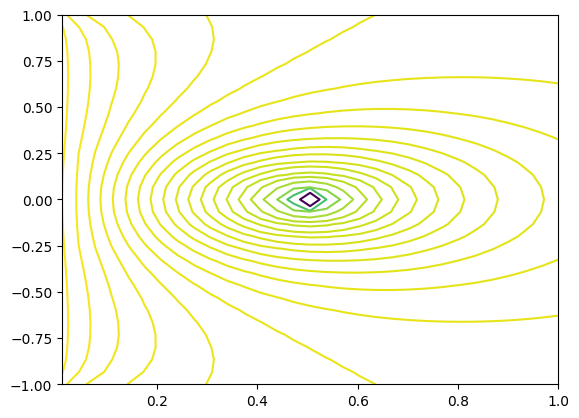

In [8]:
from matplotlib import ticker
from matplotlib import colors

X2 = np.linspace(0.01, 1, 31)
Y2 = np.linspace(-1, 1, 31)
xx2, yy2 = np.meshgrid(X2,Y2)

# now we need to evaluate the potential (scalar, so magnitude only) at each point in this meshgrid
# Doing this in correct order is key - the following code does that
Z2 = [] # this will be our potential, representing the Z axis
# take the y values one at a time
for yi in Y2:
    thisline = []
    # now we will step through all x locations at this yi
    for xi in X2:
        # and at the point (xi,yi), we evaluate the potential 
        thisline.append(VTotal2.subs({L: 2, Q: 4*np.pi, x: xi, y: yi, π: np.pi, d: 0.5, ϵ0: 1}))
    Z2.append(thisline)

#print(Z2)
Z2 = np.asarray(Z2).astype(float)

# now plot it

#simple linear contours: 
#plt.contour(xx2, yy2, Z2, levels=300)

# previous logscale approach wont work for negative potential values! (cant take log of x<0)
#plt.contour(xx2, yy2, Z2,locator=ticker.LogLocator())
#cp = plt.contour(xx2, yy2, Z2, levels=np.logspace(np.log10(np.nanmin(Z2)),np.log10(np.nanmax(Z2)),20),norm=colors.LogNorm())

# Its possible to define levels for contours by hand, eg:
#plt.contour(xx2, yy2, Z2,levels=[-500,-100,-10,-1,-0.1,0,1])

# perhaps we can define contour levels reasonably by eval the pot at spacings from 0 to d along x-axis?
clevels=[]
yi=0
# deliberately avoid x=0 and x=d where there is charge
for xi in np.linspace(0.01,0.49,20):
    clevels.append(VTotal2.subs({L: 2, Q: 4*np.pi, x: xi, y: yi, π: np.pi, d: 0.5, ϵ0: 1}))
#print(clevels)

# now, for contours, levels should be *increasing* 
# so we sort the list - default should work to produce a new list in increasing order
clevels.sort()
#print(clevels)

plt.contour(xx2, yy2, Z2,levels=clevels)

plt.show()

<h2>The Effect of Leads</h2>

So far in our computation we have considered only the line charge(s) and point charge. But to create the conductor arrangements physically, you may need to paint *leads* that would allow the charge to flow to the conductor shapes.
These leads would also have an effect on the equipotential surfaces. 
In that case, since the leads are really just lines of charge, so we could use our function VLine to compute the effects of the leads too
 (we would just need to note that the leads will be oriented along the x-axis (not y-axis), and have some different length L2). You could incorporate the effect of the leads yourself, based on the above code. 

However, it should be possible to paint the conductor close enough to the edge of the paper that any 'leads' would be very small, and therefore hopefully should not have much effect on the equipotential lines. 


<h2>Summary</h2>
This is a rough outline of the experiment (This is not necessarily a complete list of what needs to be done)
<br><br>
1) Paint the conductor geometries shown above using silver paint on carbon paper.<br>
2) Test the conductivity of the paper.  Is it perfect?  Hint: What are the uncertainties due to the assumption of a perfect conductor?<br>
3) Map the equipotential surfaces for both geometries using the multimeters.  How well do they match to the theoretical predictions above?<br>
4) The "data" for this lab is essentially a map of the equipotential surfaces for these geometries, and the "theory" is the model above.  Import images of the conductive paper and use them in your final report.  You will have to think carefully about the quantitative uncertainties of this lab. 
<br>
(E.g. To what extent are you sure you found exactly the 5V line?  Might there be some fluctuation from point to point?  What is the size of the "wiggles"?)


<h2>Assignment</h2>
The assignment for this lab is a <u>full Lab Report</u> which addresses all relevant questions and results from this lab, and reflects on each.  This report should be written in accordance with the general rules and guidelines of the Syllabus for this course; please ask if there are any questions about what specifically is required.